## Waste Classification Model

Author : Pradeeshkumar U, 
Date   : 06-02-2025, 

Importing the Basic Libraries :

In [3]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

Creating File Paths :

In [4]:
train_path = 'Dataset/TRAIN'
test_path = 'Dataset/TEST'

Importing TensorFlow Libraries :

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Conv2D,Flatten,BatchNormalization,MaxPooling2D,Dropout,Dense
from tensorflow.keras.preprocessing.image import img_to_array,ImageDataGenerator,load_img 
from tensorflow.keras.utils import plot_model
from glob import glob

Data Visualization :

In [6]:
x_train = []
y_train = []

for type in glob(train_path+'/*'):
    for img_file in tqdm(glob(type+'/*')):
        img_array = cv2.cvtColor(cv2.imread(img_file),cv2.COLOR_BGR2RGB)
        x_train.append(img_array)
        y_train.append(type.split('/')[-1][-1])
        
        
data = pd.DataFrame({'Image':x_train,'Type':y_train})

100%|██████████| 9999/9999 [00:08<00:00, 1158.67it/s]


In [7]:
data.head()

,Image,Type
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",O
1,"[[[241, 242, 247], [241, 242, 247], [241, 242,...",O
2,"[[[224, 224, 224], [229, 229, 229], [236, 236,...",O
3,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",O
4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",O


In [8]:
data.tail()

,Image,Type
22559,"[[[212, 204, 202], [212, 204, 202], [212, 204,...",R
22560,"[[[205, 204, 202], [205, 204, 202], [205, 204,...",R
22561,"[[[136, 136, 144], [136, 136, 144], [137, 137,...",R
22562,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",R
22563,"[[[242, 240, 241], [242, 240, 241], [242, 240,...",R


In [9]:
data.shape

(22564, 2)

In [10]:
data['Type'].value_counts()

Type
O    12565
R     9999
Name: count, dtype: int64

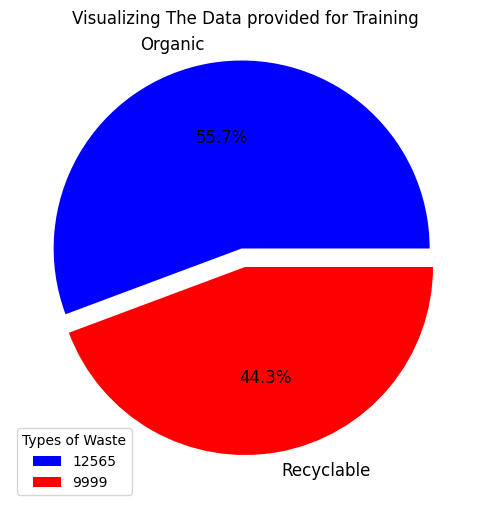

In [11]:
plt.figure(figsize=(5,12))
plt.pie(data['Type'].value_counts(),labels=['Organic','Recyclable'],colors=['blue','red'],explode=(0.1,0),textprops={'fontsize':12},autopct='%0.1f%%')
plt.title('Visualizing The Data provided for Training')
plt.legend(data['Type'].value_counts(),title = 'Types of Waste',loc = 'best')
plt.tight_layout()
plt.show()

Let's explore and see some of the image samples randomly :

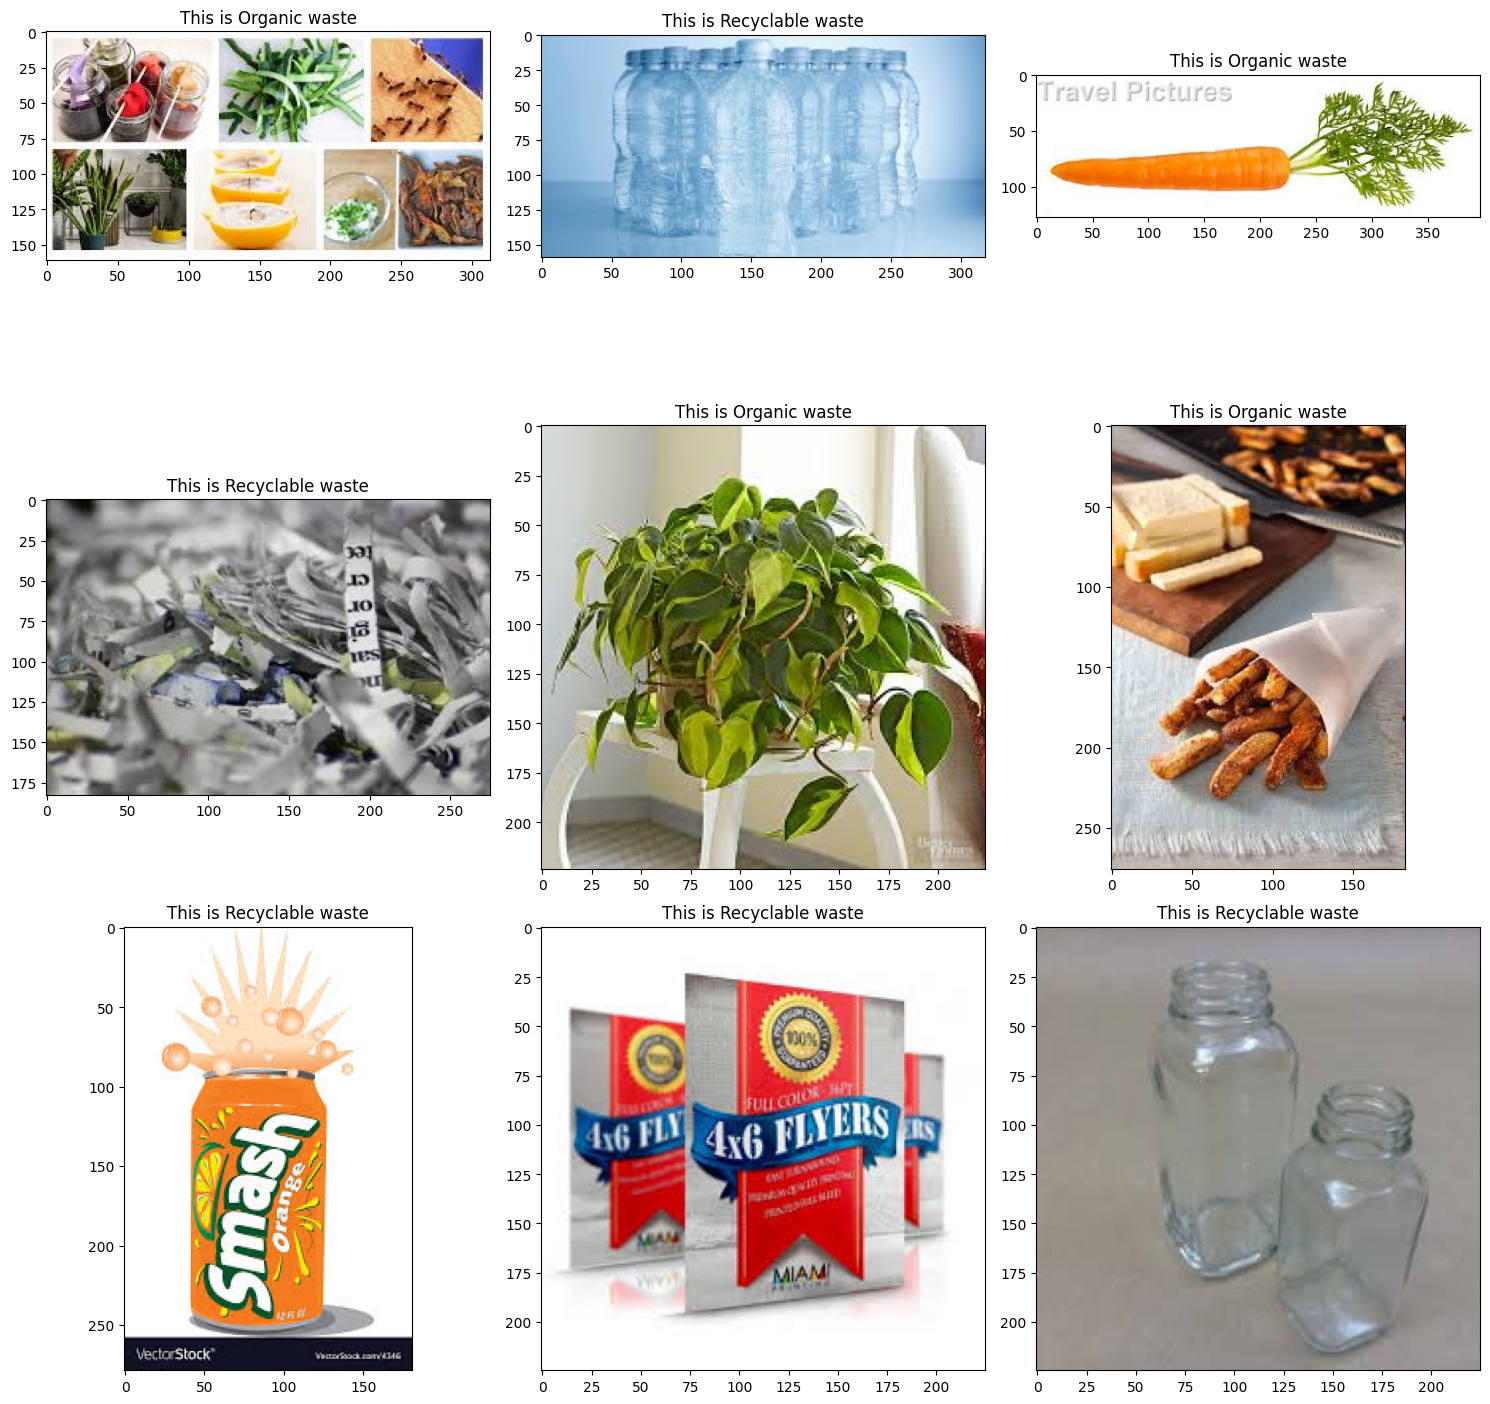

In [12]:
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(3,3,i+1)
    index = np.random.randint(22500)
    plt.title(f'This is {'Recyclable' if data['Type'][index]=='R' else 'Organic'} waste')
    plt.imshow(data['Image'][index])
    plt.tight_layout()
    

Building the CNN model :

In [13]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape = (224,224,3)))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2,activation='sigmoid'))

model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

batch_size = 256

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

Preparing data for Training :

In [15]:
img_data_gen = ImageDataGenerator(rescale=1./255)

In [16]:
train_gen_data = img_data_gen.flow_from_directory(
    train_path,
    target_size = (224,224),
    batch_size=batch_size,
    color_mode ='rgb',
    class_mode = 'categorical'
)

test_gen_data = img_data_gen.flow_from_directory(
    test_path,
    target_size = (224,224),
    batch_size=batch_size,
    color_mode ='rgb',
    class_mode = 'categorical'
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


Training the data :

In [17]:
hist = model.fit(
    train_gen_data,
    epochs = 10,
    validation_data = test_gen_data
)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.6804 - loss: 0.7087 - val_accuracy: 0.8444 - val_loss: 0.4092
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 185s 2s/step - accuracy: 0.8190 - loss: 0.4366 - val_accuracy: 0.8707 - val_loss: 0.3292
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 189s 2s/step - accuracy: 0.8319 - loss: 0.4012 - val_accuracy: 0.8611 - val_loss: 0.3272
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.8494 - loss: 0.3641 - val_accuracy: 0.8838 - val_loss: 0.2873
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - accuracy: 0.8647 - loss: 0.3382 - val_accuracy: 0.8603 - val_loss: 0.3362
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 183s 2s/step - accuracy: 0.8777 - loss: 0.3111 - val_accuracy: 0.8997 - val_loss: 0.2630
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 182s 2s/step - accuracy: 0.8913 - loss: 0.2784 - val_accuracy: 0.8854 - val_loss: 0.2876
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 218s 2s/step - accuracy: 0.9013 - loss: 0.2522 - val_accuracy: 0.8878 - v

Visualising the accuracy of the model :

In [18]:
print(f'Best Training Accuracy: {max(hist.history['accuracy']):.4f}')
print(f'Best Validation Accuracy: {max(hist.history['val_accuracy']):.4f}')

Best Training Accuracy: 0.9290
Best Validation Accuracy: 0.8997


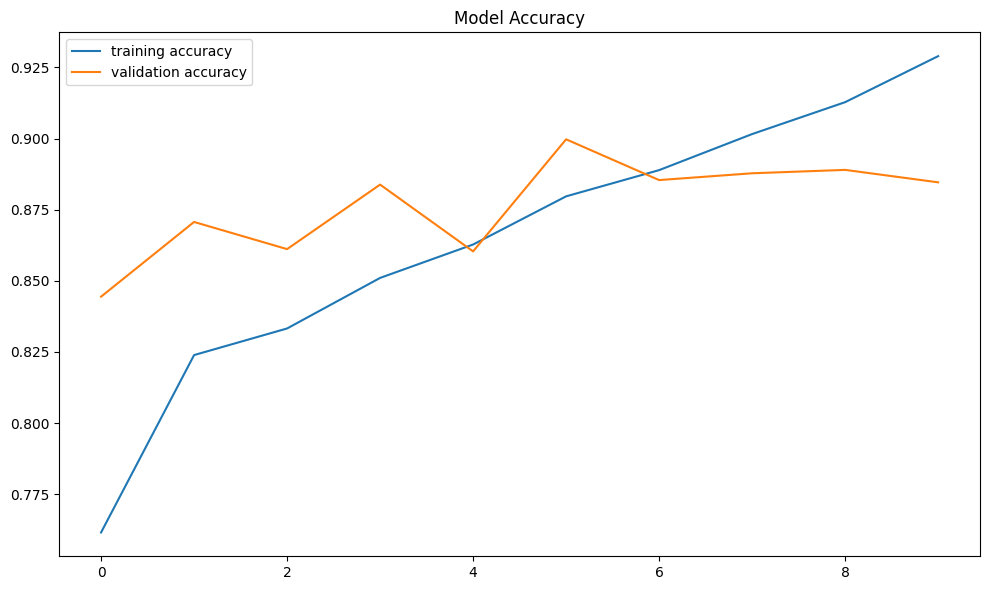

In [20]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['accuracy'],label='training accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

Visualising the loss of the model :

In [21]:
print(f'Maximum of the Training loss: {max(hist.history['loss']):.4f}')
print(f'Maximum of the Validation loss: {max(hist.history['val_loss']):.4f}')

Maximum of the Training loss: 0.5415
Maximum of the Validation loss: 0.4092


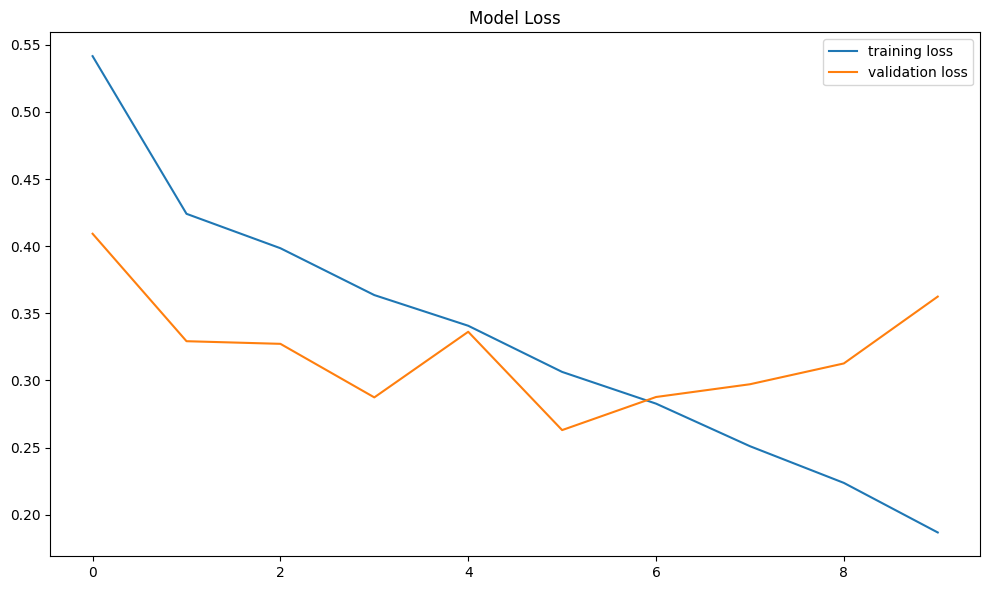

In [28]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'],label='training loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.legend()
plt.tight_layout()
plt.show()

Saving our model :

In [33]:
model.save('waste_classifier.keras')

Just using sample data to test the model temporarily :

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


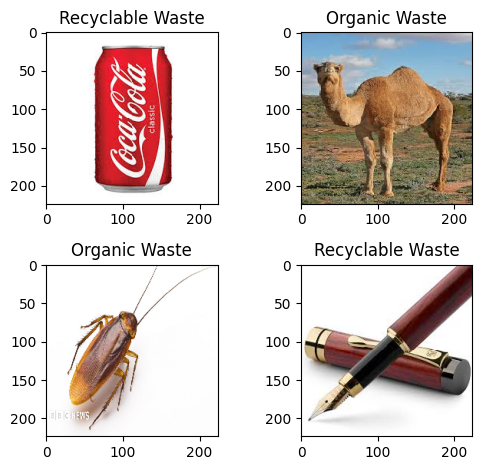

In [31]:
for i in glob('Test/*'):
    test_img = load_img(i,target_size = (224,224))
    test_img_array = img_to_array(test_img)
    test_img_array = test_img_array / 255.0
    test_img_array = np.reshape(test_img_array, [-1,224,224,3])
    prediction = model.predict(test_img_array)
    plt.Figure(figsize=(20, 20))
    plt.subplot(2,2,int(i.split('_')[-1].split('.')[0]))
    plt.title('Organic Waste' if np.argmax(prediction, axis=1) == [0] else 'Recyclable Waste')
    plt.imshow(test_img)
    plt.tight_layout()